## Pre processing

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 114kB/s 
     |████████████████████████████████| 6.8MB 41.2MB/s 
     |████████████████████████████████| 983kB 42.4MB/s 
     |████████████████████████████████| 266kB 51.6MB/s 
     |████████████████████████████████| 1.9MB 37.1MB/s 
     |████████████████████████████████| 1.2MB 31.5MB/s 
     |████████████████████████████████| 471kB 40.0MB/s 
     |████████████████████████████████| 901kB 35.3MB/s 
     |████████████████████████████████| 3.3MB 41.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.5-cp37-none-any.whl size=25281426 sha256=e616db10a3d721d7ff38ec31dfe9d25e50d5bef6e1e0031708c1d1c432195234
  Stored in directory: /root/.cache/pip/wheels/7a/22/76/e529b9bce5fffe20d7f7d53b2dc7996b145e74ae516bf54f83
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=d00b8bba3aecabce24f3057ac40220f1f7152650f9831ea101b9b9fcb91129c8
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7d

In [ ]:
# mounting google drive to colab virtual machine

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


%cd '/content/drive/MyDrive/DL_project/UTKFace_preprocessing/'

Mounted at /content/drive
/content/drive/MyDrive/DL_project/UTKFace_preprocessing


In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import h5py
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Activation, Dropout,
Flatten, Dense, Input, BatchNormalization, AveragePooling2D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pwd

/content/drive/My Drive/DL_project/UTKFace_preprocessing


In [ ]:
# loading the .h5 file into the notebook
# This file contains images in tensor/vector form
# we are loading it from the google drive

with h5py.File("UTK_predictors_X_64_pixels.h5", 'r') as hf:
  X = hf['images_in_vector'][:]

In [ ]:
#listing the names of images in the image directory
names_and_age_ds = pd.read_csv('filenames_age.csv')

In [ ]:
age = np.array(names_and_age_ds['age'])

In [ ]:
 # test train split 
 X_train, X_dummy, y_train, y_dummy = train_test_split(X, age, 
                                                       test_size=0.3, 
                                                       shuffle=True, 
                                                       random_state=42)


 X_valid, X_test, y_valid, y_test = train_test_split(X_dummy, y_dummy,
                                                     test_size=0.3,
                                                     shuffle=True, 
                                                     random_state=42)

In [ ]:
print(f"Shape of the test data :\n{X_test.shape}, {y_test.shape}\n")
print(f"Percentage of the total dataset in the training data:\n {X_test.shape[0]/X.shape[0]}\n")

Shape of the test data :
(2131, 64, 64, 3), (2131,)

Percentage of the total dataset in the training data:
 0.09004098533823467



## Model building and Training

In [ ]:
import ktrain
from ktrain import vision as vis
import re

In [ ]:
#train test split
(train_data,test_data,preprocess)=vis.images_from_array(x_train=X_train,
                                                        y_train=y_train,
                                                        is_regression=True,
                                                        validation_data=(X_valid,y_valid),
                                                        random_state=1234,
                                                        data_aug=ImageDataGenerator(
                                                                  width_shift_range=0.1,
                                                                  height_shift_range=0.1, 
                                                                  horizontal_flip=True,
                                                                  rotation_range=45)
                                                        )

/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:591: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \


In [ ]:
preprocess

[]

In [ ]:
#building a model
model=vis.image_regression_model('pretrained_resnet50',
                                 train_data=train_data,
                                 val_data=test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
pretrained_resnet50 model created.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#learner parameters
training=ktrain.get_learner(model=model,
                            train_data=train_data,
                            val_data=test_data,
                            batch_size=32)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
258/258 [==============================] - 227s 863ms/step - loss: 1686.6462 - mae: 36.4632
Epoch 2/1024
258/258 [==============================] - 220s 854ms/step - loss: 1472.2966 - mae: 33.3453
Epoch 3/1024
258/258 [==============================] - 220s 853ms/step - loss: 617.0201 - mae: 19.1020
Epoch 4/1024
258/258 [==============================] - 219s 848ms/step - loss: 244.6166 - mae: 11.8292
Epoch 5/1024
258/258 [==============================] - 219s 850ms/step - loss: 215.6681 - mae: 11.2207
Epoch 6/1024
258/258 [==============================] - 62s 236ms/step - loss: 2150.1357 - mae: 30.3731


done.
Visually inspect loss plot and select learning rate associated with falling loss


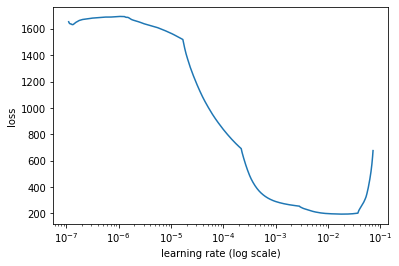

In [ ]:
training.lr_find(show_plot=True, restore_weights_only=True)

In [ ]:
#training the model with 2 epochs and learning rate = 10^-2
history=training.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
518/518 [==============================] - 34s 57ms/step - loss: 756.7026 - mae: 21.1504 - val_loss: 297.8954 - val_mae: 13.0874
Epoch 2/2
518/518 [==============================] - 28s 54ms/step - loss: 287.7693 - mae: 12.8299 - val_loss: 251.9144 - val_mae: 12.3251


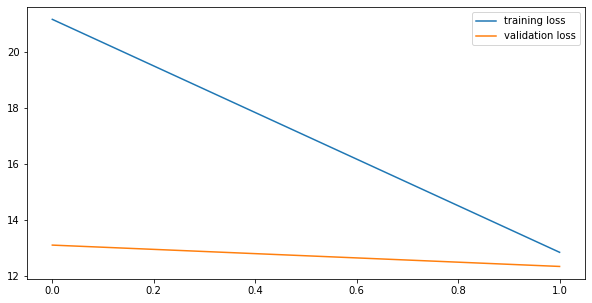

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='training loss')
plt.plot(history.history['val_mae'], label='validation loss')
plt.legend()
plt.show()

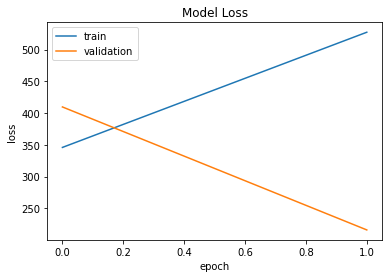

In [ ]:
training.plot('loss')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


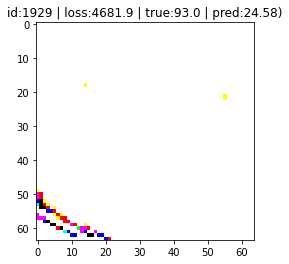

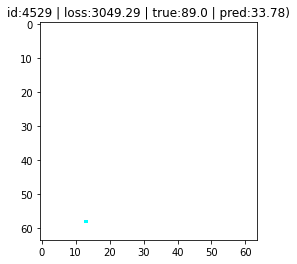

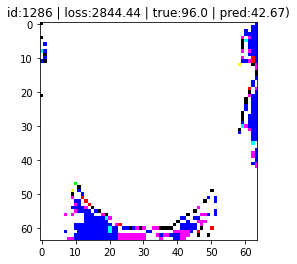

In [ ]:
training.view_top_losses(n=3)

In [ ]:
#loading the previous stored weights
model.load_weights('/content/drive/MyDrive/DL_project/weights-02.hdf5')

In [ ]:
history.history['val_mae']

[12.963929176330566, 12.101628303527832]

In [ ]:
#freezing first 15 layers and training the remaining layers
training.freeze(15)

history=training.fit_onecycle(1e-4,30,checkpoint_folder='/content/drive/MyDrive/DL_project/UTKFace_preprocessing/32/')



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/30
518/518 [==============================] - 48s 81ms/step - loss: 251.9947 - mae: 11.8012 - val_loss: 144.3385 - val_mae: 9.0702
Epoch 2/30
518/518 [==============================] - 41s 79ms/step - loss: 140.4138 - mae: 8.9147 - val_loss: 129.2442 - val_mae: 8.5760
Epoch 3/30
518/518 [==============================] - 41s 79ms/step - loss: 122.0329 - mae: 8.2467 - val_loss: 113.2944 - val_mae: 7.7960
Epoch 4/30
518/518 [==============================] - 41s 79ms/step - loss: 108.2573 - mae: 7.7504 - val_loss: 92.1976 - val_mae: 6.8783
Epoch 5/30
518/518 [==============================] - 40s 78ms/step - loss: 100.0470 - mae: 7.4250 - val_loss: 101.0058 - val_mae: 7.4078
Epoch 6/30
518/518 [==============================] - 41s 79ms/step - loss: 92.7120 - mae: 7.0777 - val_loss: 81.3530 - val_mae: 6.6545
Epoch 7/30
518/518 [==============================] - 41s 79ms/step - loss: 87.8865 - mae: 6.9155 - val_loss: 

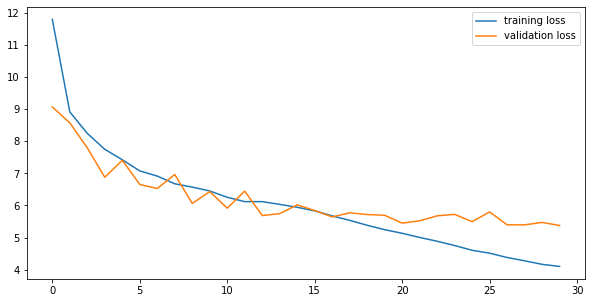

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='training loss')
plt.plot(history.history['val_mae'], label='validation loss')
plt.legend()
plt.show()

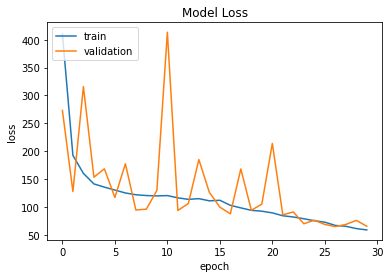

In [ ]:
training.plot('loss')

In [ ]:
#freezing first 15 layers and training the remaining layers
training.freeze(15)

training.fit_onecycle(1e-2,20,checkpoint_folder='/content/drive/MyDrive/DL_project/UTKFace_preprocessing/32/')



begin training using onecycle policy with max lr of 0.01...
Epoch 1/20
518/518 [==============================] - 85s 152ms/step - loss: 60.3763 - mae: 5.6685 - val_loss: 95.0652 - val_mae: 7.0235
Epoch 2/20
518/518 [==============================] - 76s 147ms/step - loss: 64.7773 - mae: 5.8706 - val_loss: 67.4840 - val_mae: 5.8266
Epoch 3/20
518/518 [==============================] - 76s 147ms/step - loss: 67.6567 - mae: 6.0306 - val_loss: 68.2663 - val_mae: 5.9620
Epoch 4/20
518/518 [==============================] - 76s 147ms/step - loss: 70.3396 - mae: 6.1170 - val_loss: 74.2944 - val_mae: 6.2198
Epoch 5/20
518/518 [==============================] - 76s 147ms/step - loss: 75.1463 - mae: 6.3331 - val_loss: 102.9967 - val_mae: 7.1559
Epoch 6/20
518/518 [==============================] - 76s 147ms/step - loss: 80.3064 - mae: 6.5287 - val_loss: 108.4131 - val_mae: 8.2050
Epoch 7/20
518/518 [==============================] - 76s 147ms/step - loss: 82.1738 - mae: 6.6095 - val_loss: 94.

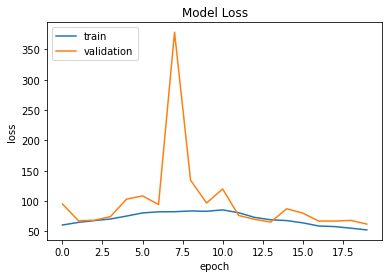

In [ ]:
training.plot('loss')

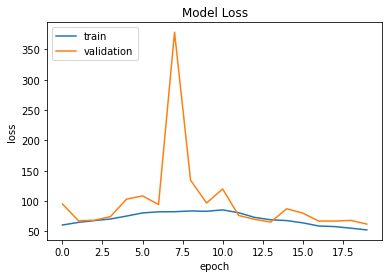

In [ ]:
training.plot('loss')

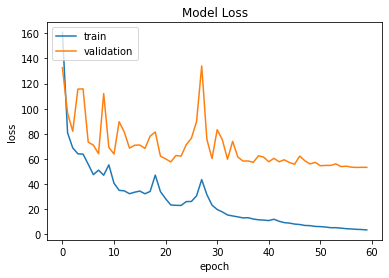

In [ ]:
training.plot('loss')


In [ ]:
train_mae=np.array([14.1385,17.4907 ,14.4631,10.5257 ,9.4719,8.7980, 8.6504 ,8.3766,8.1336,8.0925,8.0289, 8.0170 ,8.0214 ,7.8879,
7.8143,7.8784,7.7614,7.6938,7.4486,7.2618,7.0852,7.0043,6.8977,6.6906, 6.6439 ,6.4892 ,6.3133,6.2376, 
6.0027, 5.9075,5.7195,5.6195,5.6685,5.8706, 6.0306,6.1170,6.3331 , 6.5287 , 6.6095 ,6.6310 , 6.7126 ,
6.6725 ,6.7434,6.5385 ,6.2088 ,6.0740,6.0119,5.8323,5.6002 , 5.5435 ,5.4050 , 5.2935])

In [ ]:
len(valid_mae)

52

In [ ]:
valid_mae=np.array([16.5953,11.4460,13.0969,8.2018,13.5977,8.8735,9.6815,8.1986,10.2136,7.0512,7.1000,8.0563,16.3403,7.3043,
7.7062,11.2288,8.2474,7.5529,6.9048,9.7083,7.5295,7.7402,12.2855,6.7507,6.7756,5.9147,6.1738,5.8675,
5.7665,5.8833,6.2093,5.7254,7.0235,5.8266,5.9620,6.2198,7.1559,8.2050,7.3719,16.8459,8.1779,7.5440,7.8876,
6.2405,6.0302,5.7816,6.8135,6.5395,5.9477,5.7427,5.9327,5.6357])

In [ ]:
x=np.linspace(0,51,52)

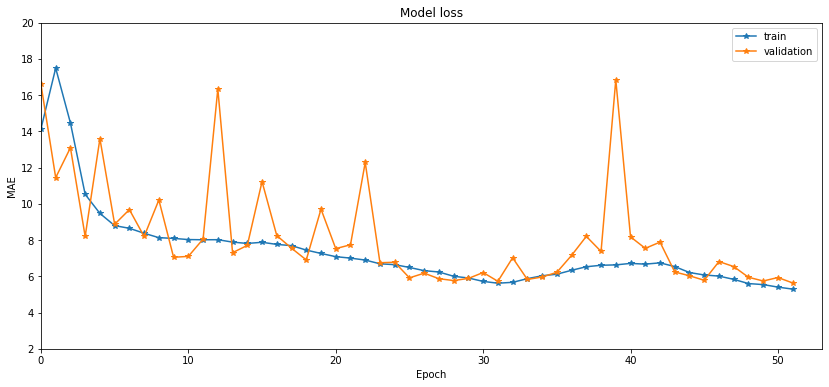

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(x,train_mae,marker='*',label='train');
plt.plot(x,valid_mae,marker='*',label='validation');
plt.xlim(0,53)
plt.ylim(2,20)
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Model loss")
plt.legend(loc='best')
plt.show()

## Prediction

In [ ]:
prediction=ktrain.get_predictor(training.model,preprocess)

In [ ]:
preds=prediction.predict(X_test)

In [ ]:
np.sum((np.squeeze(preds) - y_test)  <= 5)

1606

In [ ]:
def cum_score(max_tol, predictions, y_test):
  # total number of samples in the training set
  total_samples = len(y_test)
  # cumuliative score
  CS=[]
  for i in range(max_tol+1):
    abs_val = np.abs(np.squeeze(predictions) - y_test)
    # no of predictions that fall inside the tolerance level
    count = np.sum(abs_val <= i)
    CS.append(count/total_samples)
  return CS

In [ ]:
cum_scores = cum_score(20, predictions=preds, y_test=y_test)

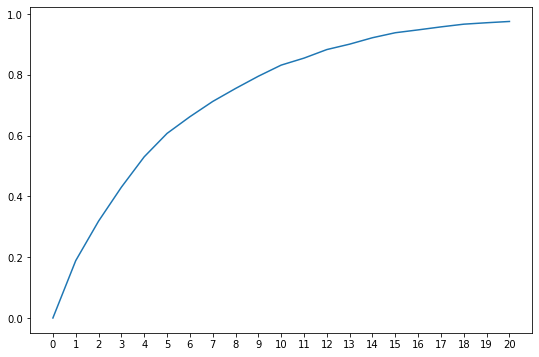

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(np.arange(21), cum_scores)
plt.xticks(np.arange(21))
plt.show()

In [ ]:
df_cs = pd.Series(cum_scores)
df_cs.to_csv('cumuliative_score_resnet50.csv')

In [ ]:
len(X_test)

2131

## Reference

https://www.youtube.com/watch?v=rwiPcSrPPQk&t=1490s

https://github.com/amaiya/ktrain